In [ ]:
# Part#1: Setting up the environment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Part 2: Define Identity and Pauli **Operators**

Next we will define Pauli Matrices

In [ ]:
I = np.array([[1, 0], [0, 1]], dtype=complex)

sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)


Part 3: Define Computational and Superposition States

Tomography requires states prepared in different bases.
These states ensure coverage along X, Y, and Z directions of the Bloch sphere.

In [ ]:
ket0 = np.array([1, 0], dtype=complex)
ket1 = np.array([0, 1], dtype=complex)

ket_plus  = (ket0 + ket1) / np.sqrt(2)
ket_minus = (ket0 - ket1) / np.sqrt(2)
ket_i     = (ket0 + 1j*ket1) / np.sqrt(2)


Part 4: Construct Density Matrix

Since Tomography works with density matrices, not state vectors.
Density matrices support noise, mixed states, and classical post-processing.

𝜌=∣𝜓⟩⟨𝜓∣

In [ ]:
def density_matrix(psi):
    return np.outer(psi, psi.conj())

Part 5: Compute Expectation Value (Born Rule)

This implements the Born rule:

⟨O⟩=Tr(ρO)

This is the mathematical bridge between quantum physics and ML data.

In [ ]:
def expectation_value(rho, observable):
    return np.real(np.trace(rho @ observable))


Part 6: Simulate Finite-Shot Measurements

Real experiments give counts, not exact expectations.
Finite shots introduce statistical noise, crucial for ML realism.

In [ ]:
def measure_expectation(rho, observable, shots=1024):
    exp_val = expectation_value(rho, observable)
    p_plus = (1 + exp_val) / 2
    counts = np.random.binomial(shots, p_plus)
    return 2 * (counts / shots) - 1


Part 7: Measure in X, Y, Z Bases

Single-qubit tomography requires three independent measurements:

σₓ

σᵧ

σ𝓏

In [ ]:
psi_true = ket_plus

rho_true = density_matrix(psi_true)

In [ ]:
shots = 1024

x_meas = measure_expectation(rho_true, sigma_x, shots)
y_meas = measure_expectation(rho_true, sigma_y, shots)
z_meas = measure_expectation(rho_true, sigma_z, shots)


Part 8: Linear Inversion Tomography

Any single-qubit state can be written as:

ρ=0.5*​(I+xσx​+yσy​+zσz​)

This is the core tomography equation.

In [ ]:
def reconstruct_density_matrix(x, y, z):
    return 0.5 * (I + x*sigma_x + y*sigma_y + z*sigma_z)

In [ ]:
rho_recon = reconstruct_density_matrix(x_meas, y_meas, z_meas)

Task 9: Validate Physical Properties

A valid density matrix must:

Have trace = 1

Be positive semi-definite

In [ ]:
np.trace(rho_recon)

In [ ]:
np.linalg.eigvals(rho_recon)

Part 10: Compute Fidelity

Fidelity measures how close the reconstructed state is to the true state.

In [ ]:
def fidelity(rho, sigma):
    sqrt_rho = sqrtm(rho)
    product = sqrt_rho @ sigma @ sqrt_rho
    return np.real(np.trace(sqrtm(product)))**2

In [ ]:
from scipy.linalg import sqrtm

In [ ]:
fidelity(rho_true, rho_recon)

np.float64(0.9999999999999978)

Part 11: Visualize Bloch Components

The Bloch vector components are exactly the measured expectations.

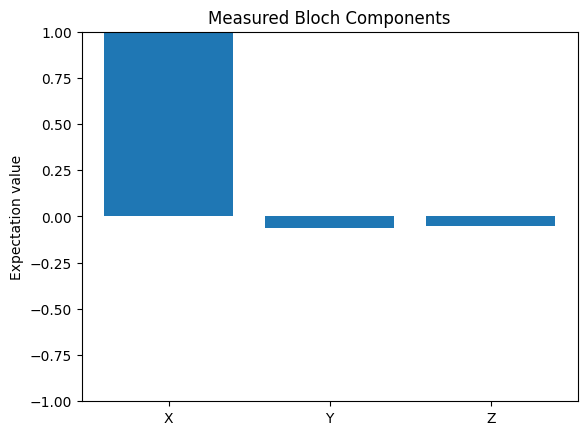

In [ ]:
bloch = [x_meas, y_meas, z_meas]
plt.bar(['X', 'Y', 'Z'], bloch)
plt.ylim([-1, 1])
plt.ylabel("Expectation value")
plt.title("Measured Bloch Components")
plt.show()